In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt


In [87]:

def cz_err_model(i_c):
    v_x = np.zeros(2,dtype=int)
    v_z = np.zeros(2,dtype=int)
    if i_c == 1:
        v_x[0] = 1
    elif i_c == 2:
        v_x[0] = 1
        v_z[0] = 1
    elif i_c == 3:
        v_z[0] = 1
    elif i_c == 4:
        v_z[1] = 1
    elif i_c == 5:
        v_x[0] = 1
        v_z[1] = 1
    elif i_c == 6:
        v_x[0] = 1
        v_z = np.ones(2,dtype=int)
    elif i_c == 7:
        v_z = np.ones(2,dtype=int)
    if i_c ==0:
        prob = 1-14*p_c/15
    elif 0 < i_c <= 4:
        prob = 2*p_c/15
    else:
        prob = 0*2*p_c/15
    return v_x, v_z, prob

pc_list = np.linspace(0,0.03)
p_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    vec_x = np.zeros(5,dtype=int)
    vec_z = np.zeros(5,dtype=int)
    for i_1 in range(8):
        vx, vz, p1 = cz_err_model(i_1)
        vec_x[0:2] += vx
        vec_z[0:2] += vz
        for i_2 in range(8):
            vx, vz, p2 = cz_err_model(i_2)
            vec_x[1:3] += vx
            vec_z[1:3] += vz
            for i_3 in range(8):
                vx, vz, p3 = cz_err_model(i_3)
                vec_x[2:4] += vx
                vec_z[2:4] += vz
                for i_4 in range(8):
                    vx, vz, p4 = cz_err_model(i_4)
                    vec_x[3:5] += vx
                    vec_z[3:5] += vz

                    xcomp = (vec_z[0]+ vec_x[2] + vec_z[2] + vec_x[3] + vec_z[3] + vec_x[4])%2
                    zcomp = (vec_x[1] + vec_z[1] + vec_x[2] + vec_z[2] + vec_z[4])%2

                    p_tot[2*zcomp+xcomp,i_p] += p1*p2*p3*p4



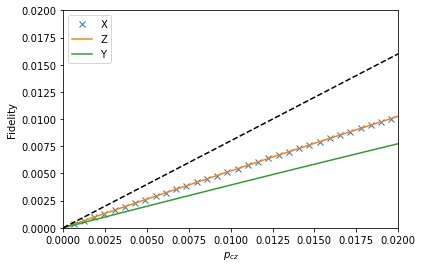

In [89]:
# for i_l in range(1,4):
#     plt.plot(pc_list,p_tot[i_l,:])
plt.plot(pc_list,p_tot[1,:],"x",label="X")
plt.plot(pc_list,p_tot[2,:],label="Z")
plt.plot(pc_list,p_tot[3,:],"-",label="Y")
    
# plt.plot(pc_list,np.sum(p_tot[0:,:],axis=0))
# inFid = 2/3*np.sum(p_tot[1:,:]
# plt.plot(pc_list,inFid,axis=0))
plt.plot(pc_list,12/15*pc_list,"k--")
plt.ylim(0,0.02)
plt.xlim(0,0.02)
plt.xlabel(r"$p_{cz}$")
plt.ylabel("Fidelity")
plt.legend()
plt.show()


In [60]:
1.6+ 8/3*2/3

3.3777777777777778